In [1]:
import sys
assert sys.version_info >= (3,5)

# 사이킷런 >=0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 깔끔한 그래프 출력을 위해 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
# 그래프에서 마이너스 폰트 깨지는 문제 해결
mpl.rcParams['axes.unicode_minus'] = False

# 한글폰트 사용
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.

In [3]:
# 시각화
# 그림을 저장할 위치 
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ml_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "."+fig_extension)
    print("그림 저장: ",fig_id)
    
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# 불필요한 경고 무시
import warnings
warnings.filterwarnings(action = "ignore", message="^internal gelsd")


In [4]:
import pandas as pd

PROJECT_ROOT_DIR = "."
#CHAPTER_ID = "ml_project"
FILE_PATH = os.path.join(PROJECT_ROOT_DIR, "datasets")

def load_data(file_path=FILE_PATH):   
    csv_path = os.path.join(file_path, "real_estate.csv")
    return pd.read_csv(csv_path, encoding='cp949')  # 한글깨짐 방지

raw_df = load_data()
raw_df.head()

C:\Users\aro\anaconda3\envs\envexample\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도,건물명
0,11290-2020-4-0000066-1,1129010000000000000.0,11290,성북구,1129013800,장위동,2020,4,신고,1,0.0,59.92,2,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티
1,11290-2020-4-0000628-1,1129010000000000000.0,11290,성북구,1129013400,길음동,2020,4,신고,1,0.0,84.77,2,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아
2,11530-2020-4-0014284-1,1153010000000000000.0,11530,구로구,1153010200,구로동,2020,4,신고,1,NaN,36.90,0,1.0,2001,아파트,105000000,1994.0,궁전아트빌라
3,11170-2020-4-0005040-1,1117010000000000000.0,11170,용산구,1117011500,산천동,2020,4,신고,1,NaN,59.55,0,2.0,2001,아파트,830000000,2001.0,리버힐삼성
4,11170-2020-4-0001553-1,1117010000000000000.0,11170,용산구,1117012900,이촌동,2020,4,신고,1,NaN,64.43,0,5.0,2001,아파트,735000000,1971.0,강변


In [5]:
df = raw_df[['자치구명','대지권면적','건물면적','층정보','건물주용도','건축년도','물건금액']]
df.head()

,자치구명,대지권면적,건물면적,층정보,건물주용도,건축년도,물건금액
0,성북구,0.0,59.92,5.0,아파트,0.0,749000000
1,성북구,0.0,84.77,18.0,아파트,0.0,1200000000
2,구로구,NaN,36.90,1.0,아파트,1994.0,105000000
3,용산구,NaN,59.55,2.0,아파트,2001.0,830000000
4,용산구,NaN,64.43,5.0,아파트,1971.0,735000000


In [6]:
df = df.dropna(subset=["건축년도"], axis=0)
df.head()

,자치구명,대지권면적,건물면적,층정보,건물주용도,건축년도,물건금액
0,성북구,0.0,59.92,5.0,아파트,0.0,749000000
1,성북구,0.0,84.77,18.0,아파트,0.0,1200000000
2,구로구,NaN,36.90,1.0,아파트,1994.0,105000000
3,용산구,NaN,59.55,2.0,아파트,2001.0,830000000
4,용산구,NaN,64.43,5.0,아파트,1971.0,735000000


In [7]:
df = df[df['건축년도']!=0]

In [8]:
df.head()

,자치구명,대지권면적,건물면적,층정보,건물주용도,건축년도,물건금액
2,구로구,NaN,36.90,1.0,아파트,1994.0,105000000
3,용산구,NaN,59.55,2.0,아파트,2001.0,830000000
4,용산구,NaN,64.43,5.0,아파트,1971.0,735000000
5,용산구,NaN,105.75,9.0,아파트,1982.0,1430000000
6,용산구,43.9,73.04,3.0,연립주택,1993.0,400000000


# 4. 데이터 떼어놓기

In [9]:
# # 8:2로 분리
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(df, test_size= 0.2, random_state = 42)
# test_set.head()

In [10]:
# train_set-> housing
# test_set 그대로
#housing_train = train_set.copy()

<AxesSubplot:>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


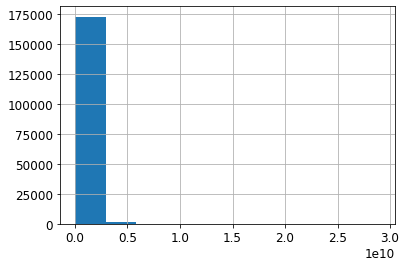

In [11]:
df["물건금액"].hist()

<AxesSubplot:>

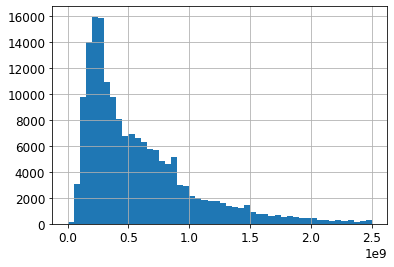

In [12]:
df["물건금액"].hist(range=(0.0E10,0.25E10), bins=50)

In [13]:
df["물건금액_카테고리"] = pd.cut(df["물건금액"],   # 동일한 길이로 나누어 범주화함
                              bins = [0.0E9, 0.2E9, 0.4E9, 0.6E9, 0.8E9, 1.0E9, np.inf],  # 0~1.5 사이면 1로 labeling, 1.5~3이면 2로 labeling
                              labels = [1,2,3,4,5,6])
df["물건금액_카테고리"].value_counts()

2    52463
1    28471
3    28416
6    27362
4    22155
5    15417
Name: 물건금액_카테고리, dtype: int64

<AxesSubplot:>

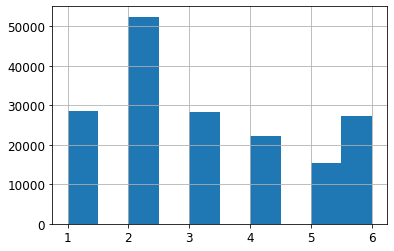

In [14]:
df["물건금액_카테고리"].hist()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit  # 데이터 내 층의 비율을 고려하여 층별로 구분하여 무작위로 train, test 분할
split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)     # n_splits: 분리할 데이터 셋의 계층 개수  # 클래스 형태

for train_index, test_index in split.split(df, df["물건금액_카테고리"]):  
    train_set = df.reindex(index = train_index)  # loc[train_index]
    test_set = df.reindex(index = test_index) # loc[test_index]

print(train_set["물건금액_카테고리"].value_counts()/len(train_set))
print(df["물건금액_카테고리"].value_counts() / len(df))

2    0.298701
1    0.162343
3    0.161884
6    0.153959
4    0.126159
5    0.087214
Name: 물건금액_카테고리, dtype: float64
2    0.301020
1    0.163360
3    0.163044
6    0.156997
4    0.127120
5    0.088459
Name: 물건금액_카테고리, dtype: float64


In [16]:
train_set_y = train_set["물건금액"] #y값 떼놓음
test_set_y = test_set["물건금액"]

In [17]:
# income_cat 컬럼 지우기
for set_ in (train_set,test_set):
    set_.drop(["물건금액","물건금액_카테고리"], axis=1, inplace=True)

In [18]:
housing_train_X = train_set.copy()
housing_train_y = train_set_y.copy()
housing_test_X = test_set.copy()
housing_test_y = test_set_y.copy()

-------

# 5. 데이터 이해하기


# 7. 데이터 준비하기

In [19]:
# 대지권 면적 null -> 아파트 = 0
housing_train_X['대지권면적'] = housing_train_X['대지권면적'].fillna(0)

# 층정보 null -> 단독주택 = 1
housing_train_X['층정보'] = housing_train_X['층정보'].fillna(1)

# 건축년도 -> 연식으로 계산
housing_train_X['연식'] = 2021 - housing_train_X['건축년도']
housing_train_X = housing_train_X.drop("건축년도",axis=1)

In [20]:
housing_train_X.head()

,자치구명,대지권면적,건물면적,층정보,건물주용도,연식
73809,성북구,21.06,40.08,5.0,연립주택,18.0
107945,은평구,0.00,12.44,4.0,아파트,7.0
31421,동대문구,55.25,53.76,3.0,연립주택,39.0
92236,도봉구,0.00,84.97,13.0,아파트,27.0
12982,영등포구,0.00,163.68,22.0,아파트,17.0


In [21]:
# housing = train_set.drop("median_house_value", axis=1)  # 훈련 세트를 위해 label 삭제
# housing_labels = strat_train_set["median_house_value"].copy()
# housing_labels.head()

# sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()  
# sample_incomplete_rows

In [22]:
housing_num = housing_train_X.drop(['자치구명','건물주용도'],axis=1)

In [23]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139427 entries, 73809 to 66114
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대지권면적   139427 non-null  float64
 1   건물면적    138069 non-null  float64
 2   층정보     139427 non-null  float64
 3   연식      138069 non-null  float64
dtypes: float64(4)
memory usage: 5.3 MB


In [24]:
housing_num.head()

,대지권면적,건물면적,층정보,연식
73809,21.06,40.08,5.0,18.0
107945,0.00,12.44,4.0,7.0
31421,55.25,53.76,3.0,39.0
92236,0.00,84.97,13.0,27.0
12982,0.00,163.68,22.0,17.0


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),  # 수치형
])
housing_num_tr = num_pipeline.fit_transform(housing_num)  # fit 한 후 transform (위의 pipeline 작업 적용)
housing_num_tr.shape

(139427, 4)

In [26]:
housing_num_tr

array([[-0.06542744, -0.46783778, -0.21277641, -0.12546622],
       [-0.49763835, -0.87689766, -0.38884768, -1.03344496],
       [ 0.63624828, -0.26537978, -0.56491895,  1.60794773],
       ...,
       [-0.49763835, -0.17391848, -0.74099022,  0.45233843],
       [-0.49763835,  0.63443357, -0.74099022, -0.37309679],
       [-0.49763835, -0.17303051,  1.5479363 ,  0.12216434]])

In [27]:
# #oneHotEncoder => 자치구, 건물주용도

# from sklearn.preprocessing import OneHotEncoder
# cat_encoder = OneHotEncoder()

# housing_cat1 = housing[["자치구명"]]
# housing_cat_1hot = cat_encoder.fit_transform(housing_cat1)
# # housing_cat_1hot.toarray()

# housing_cat2 = housing[["건물주용도"]]
# housing_cat_2hot = cat_encoder.fit_transform(housing_cat2)
# # housing_cat_2hot.toarray()

In [28]:
housing_train_X['자치구명'].values

array(['성북구', '은평구', '동대문구', ..., '강동구', '성북구', '용산구'], dtype=object)

In [29]:
from sklearn.compose import ColumnTransformer  # 원래 만들어진 pipeline에 추가하기 위한 모듈

num_attribs = list(housing_num)
cat_attribs = ['건물주용도','자치구명']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing_train_X)
print(housing_prepared)
# print(housing_prepared.shape)

  (0, 0)	-0.06542744418443326
  (0, 1)	-0.467837778960478
  (0, 2)	-0.212776410633023
  (0, 3)	-0.12546622460637866
  (0, 6)	1.0
  (0, 25)	1.0
  (1, 0)	-0.4976383455418708
  (1, 1)	-0.8768976628755023
  (1, 2)	-0.3888476812812428
  (1, 3)	-1.0334449624471769
  (1, 5)	1.0
  (1, 30)	1.0
  (2, 0)	0.6362482783896783
  (2, 1)	-0.26537977563350507
  (2, 2)	-0.5649189519294626
  (2, 3)	1.607947729453327
  (2, 6)	1.0
  (2, 19)	1.0
  (3, 0)	-0.4976383455418708
  (3, 1)	0.19651454336026872
  (3, 2)	1.1957937545527355
  (3, 3)	0.6174254699906381
  (3, 5)	1.0
  (3, 18)	1.0
  (4, 0)	-0.4976383455418708
  :	:
  (139422, 9)	1.0
  (139423, 0)	-0.4976383455418708
  (139423, 1)	-0.17332650219097792
  (139423, 2)	1.724007566497395
  (139423, 3)	-1.5287060921785214
  (139423, 5)	1.0
  (139423, 20)	1.0
  (139424, 0)	-0.4976383455418708
  (139424, 1)	-0.17391848465684626
  (139424, 2)	-0.7409902225776824
  (139424, 3)	0.4523384267468566
  (139424, 5)	1.0
  (139424, 10)	1.0
  (139425, 0)	-0.4976383455418708


In [30]:
    ("borough", OneHotEncoder(), ["자치구명"]),
    ("major_use", OneHotEncoder(), ["건물주용도"]),

(('major_use', OneHotEncoder(), ['건물주용도']),)

In [31]:
# standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_scaled = scaler.fit(X_train).transform(X_train)

X_scaled_d = scaler.fit_transform(X_train)

NameError: name 'X_train' is not defined